In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256 # pixels
BATCH_SIZE = 32 # bactch of images so one batch will have 32 images
CHANNELS = 3 # classification of data 
EPOCHS = 20 # train the model by running n times 

In [3]:
# TensorFlow image_data_from_directory (tensorflow.org)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# store the folder names under PlantVillage folder (images are categorized and stored in the respective folders) as class names in the class_names e.g. ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy']
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# Len gives 68 because "Every element in the dataset is actually a batch of 32 (BATCH_SIZE) images" so if you do 68*32 which 
# is 2176 (lil higher than 2152 images because last images are not that perfect hence showing little more than 2152
print(len(dataset)) 
68 * 32

68


2176

(32, 256, 256, 3)
[1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 2 0 2 0 1 2 1 0 1 1 1 0 0]
tf.Tensor(
[[[172. 160. 160.]
  [184. 172. 172.]
  [179. 167. 167.]
  ...
  [148. 136. 136.]
  [142. 130. 130.]
  [152. 140. 140.]]

 [[167. 155. 155.]
  [178. 166. 166.]
  [171. 159. 159.]
  ...
  [148. 136. 136.]
  [142. 130. 130.]
  [146. 134. 134.]]

 [[155. 143. 143.]
  [173. 161. 161.]
  [173. 161. 161.]
  ...
  [149. 137. 137.]
  [142. 130. 130.]
  [137. 125. 125.]]

 ...

 [[198. 186. 186.]
  [182. 170. 170.]
  [175. 163. 163.]
  ...
  [147. 133. 130.]
  [147. 133. 130.]
  [158. 144. 141.]]

 [[191. 179. 179.]
  [181. 169. 169.]
  [174. 162. 162.]
  ...
  [147. 133. 130.]
  [147. 133. 130.]
  [155. 141. 138.]]

 [[175. 163. 163.]
  [176. 164. 164.]
  [172. 160. 160.]
  ...
  [149. 135. 132.]
  [147. 133. 130.]
  [147. 133. 130.]]], shape=(256, 256, 3), dtype=float32)
[[[172. 160. 160.]
  [184. 172. 172.]
  [179. 167. 167.]
  ...
  [148. 136. 136.]
  [142. 130. 130.]
  [152. 140. 140.]]

 [[167. 

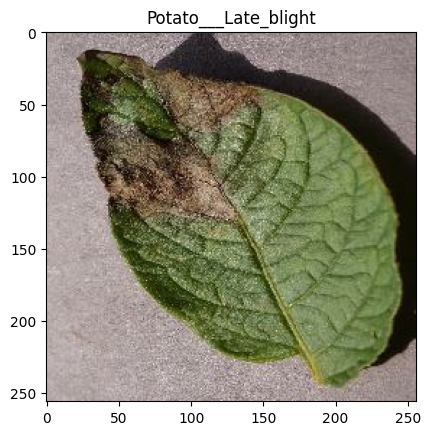

In [7]:
# lets explore the data set ; working on a batch
for image_batch, label_batch in dataset.take(1):
    # returns (32, 256, 256, 3) because every batch is of 32 images, and 256x256 pixles, and 3 is RGB channels
    print(image_batch.shape)
    # every element you get is Tensor hence needs to convert it in numpy()
    # it returns array of 0, 1, & 2 where 0 is class Potato___Early_blight, 1 is class Potato___Late_blight, and 2 is class Potato___healthy
    print(label_batch.numpy())
    # is you want to print image e.g. first image use following whihc returns a Tensor
    print(image_batch[0])
    # now if you want to convert the tensor into numpy you can write which returns 3D array and every number is btw 0-255 (color is represented as 0-255)
    print(image_batch[0].numpy())
    #get the shape of the image which will return (255,255,3) pixels, channgles
    print(image_batch[0].shape)
    
    # Visualize the Image - since its in float, it needs to be converted into int
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # if you want to turn X and Y Axis off 
    #plt.axis("off")
    # class has all the three classes and label_batch has label for those images.
    plt.title(class_names[label_batch[0]])


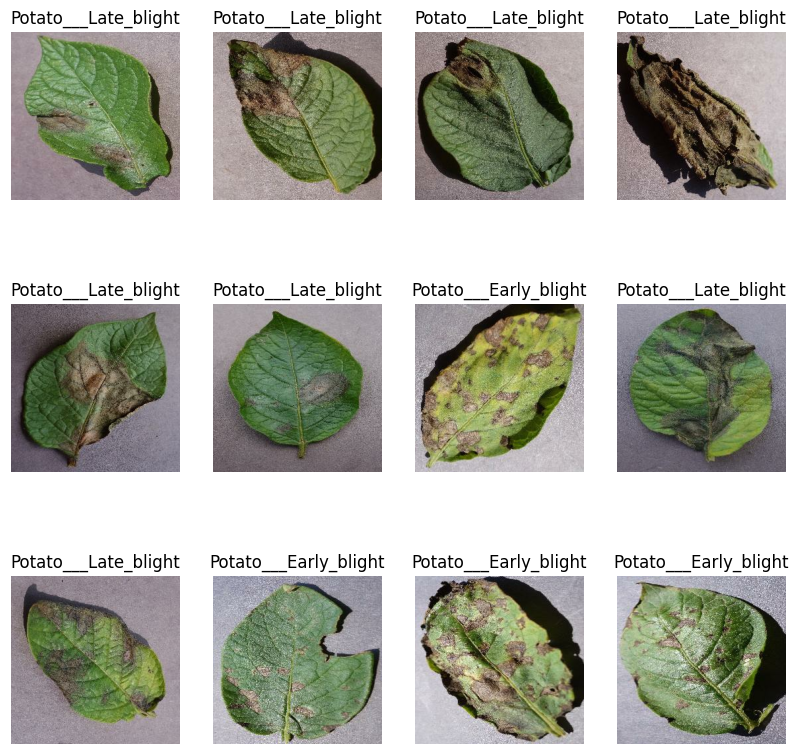

In [8]:
# lets explore the data set further
# if you run following loop without plt.figure command the area of the image will cut-off. Following command assign an area of 10x10 to show the image in that area
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    # loop into the a batch and display first 12 images
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [49]:
# Split he dataset into train, test. We will keep 80% of data as Traininig data, 10% validation, and 10% test. Validation set will be used
# during the training process. After each EOPCH (run) do the validation on 10% of data. Once done with all the EPOCHS, and data is validated 
# with 10% of data do the test with 10% of images before making it available for the real world
#80% ==> training
#20% ==> 10% validation, 10% test

# in the following code out of total 68 samples we assigned 54 to  train_dataset, 6 to validation_dataset, and 8 to test_dataset

In [10]:
train_size = 0.8 # 80%
No_of_samples = len(dataset)*train_size
type(No_of_samples)
No_of_samples = int(No_of_samples)

In [11]:
# train_ds is train dataset by taking No_of_samples (basically 80% of total element which is stored in No_of_samples)
train_dataset = dataset.take(No_of_samples)
len(train_dataset)

54

In [12]:
# similar to taking 80% images (baseically batches of images) above for train size, now split remaining batches of 20% into test and validation each

# to do so first skip the 80% which we have already taken and then split into 10% each from remaining
test_ds = dataset.skip(No_of_samples)
validation_size = 0.1
No_of_validation_samples = int(len(dataset)*validation_size)

In [13]:
validation_dataset = test_ds.take(No_of_validation_samples)

len(validation_dataset)

6

In [54]:
test_dataset = test_ds.skip(len(validation_dataset))
len(test_dataset)

8

In [55]:
# above code is hard coded to split the batches (images) into test, validate, and train dataset. To make it more generic changed the
# above code into a function

def get_dataset_partition_td(ds, train_split = 0.8, validation_split =0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(validation_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [56]:
train_ds, val_ds, test_ds = get_dataset_partition_td(dataset)

In [57]:
len(train_ds)

54

In [58]:
len(val_ds)

6

In [59]:
len(test_ds)

8

In [60]:
# watch the video of tensorflow data pipeline to understand the concept of caching, pre-fetching etc. Which is what going to be done below

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # at first iteration it will get the images and store in the memory for the subsequent iterations. Watch the mentioned video to find out shuffle 1000 images
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [61]:
# first thing we do in image processing is scale. The image numpy array we saw 0-255; you make it to number 0 and 1. This will scale the image to 255
# we supply this layer when actual model is built
# layers.experimental.preprocessing is an API - its not experimental only - its stable build; confirmed from TensorFlow team
# when we supply this layer to the model we need to make sure all images are of 256x256 hence resizing it before sending to the model. Currently all 
# images in the folder are of 256x256 but just to make sure, resizing it again.

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# before supplying the images to the model trying to make the images more robust. Say image is rotated, or contrast then model will not perform better
# hence we need to make it more robust. Watch the video Data augmentation to address overfitting | Deep Learning Tutorial 26. By doing this step you 
# are creating different images (basically training samples from the original image) out of one e.g. say Horizontal flip, Contrast, Zoom, Rotation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [62]:
# Creating the Convolutional Neural Network (CNN) model 
# Famous type of Neural Network to solve image classification kind of problem
# Video to refer: Simple explanation of convolutional neural network | Deep Learning Tutorial 23 (Tensorflow & Python)
# Going to use Convolutional, ReLU, and Pooling
# Look for tensorflow conv2d layer in google for the arguments of the function where
# kernel size is the size of the filters. basically making the image and in a block like 3x3 block or filter and go forward n stride right/down
# filter is - finding the features like eye, nose, ears, body etc. 
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Define the Neural Network Architecture like how many layers what each layer is e.g. CNN, Relu, Pooling etc.
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (input_shape)), # CNN + relu layer where 32 is Neurons - try and hit
    layers.MaxPooling2D((2,2)), # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu'), # CNN + relu layer
    layers.MaxPooling2D((2,2)), # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu'), # CNN + relu layer
    layers.MaxPooling2D((2,2)), # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu', input_shape = (input_shape)), # CNN + relu layer
    layers.MaxPooling2D((2,2)), # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu', input_shape = (input_shape)), # CNN + relu layer
    layers.MaxPooling2D((2,2)), # Max pooling layer
    layers.Conv2D(64, (3,3), activation='relu', input_shape = (input_shape)), # CNN + relu layer
    layers.MaxPooling2D((2,2)), # Max pooling layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), # last layer with 3 Neurons with softmax activation function (normalized the probability of the classes)
])

model.build(input_shape=input_shape)

In [63]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Compile the model using the optimizer

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] # in each EPOCH what metrics you wanna use to kind of track your training process
)

In [78]:
# Final step where you actually train your network using the train dataset. history will store the history of each epoch so that we can create some charts out of it
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9857 - loss: 0.0388 - val_accuracy: 0.9479 - val_loss: 0.1831
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9818 - loss: 0.0509 - val_accuracy: 0.9531 - val_loss: 0.1333
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9860 - loss: 0.0480 - val_accuracy: 0.9219 - val_loss: 0.2581
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9824 - loss: 0.0390 - val_accuracy: 0.9427 - val_loss: 0.1940
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9860 - loss: 0.0393 - val_accuracy: 0.8906 - val_loss: 0.3612
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9402 - loss: 0.1448 - val_accuracy: 0.9531 - val_loss: 0.1296
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9853 - loss: 0.0504 - val_accuracy: 0.9323 - val_loss: 0.2011
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9893 - loss: 0.0327 - val_accuracy: 0.9740 - val_loss:

In [79]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.9908 - loss: 0.0326


In [81]:
scores # returns result of evaluate where first parameter is the loss and seocond is accuracy

[0.0345061719417572, 0.98828125]

In [82]:
# lets see what histrory has got. Its actually the callback of each EPOCH basically log
history

In [83]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [84]:
history.history.keys() # return values while running the EPOCHS which is e.g. accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9635 - val_loss: 0.0937

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [85]:
# You can analyze the history by creating plots etc.

In [86]:
history.history['accuracy'] # its Python list

[0.9820601940155029,
 0.9832175970077515,
 0.9826388955116272,
 0.9809027910232544,
 0.9733796119689941,
 0.9554398059844971,
 0.9832175970077515,
 0.984375,
 0.9901620149612427,
 0.9918981194496155,
 0.9890046119689941,
 0.9861111044883728,
 0.9785879850387573,
 0.9878472089767456,
 0.9890046119689941,
 0.9884259104728699,
 0.9884259104728699,
 0.9913194179534912,
 0.9913194179534912,
 0.9890046119689941]

In [87]:
len(history.history['accuracy']) # number of records in it means EPOCHS

20

In [88]:
# lets create a plot

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

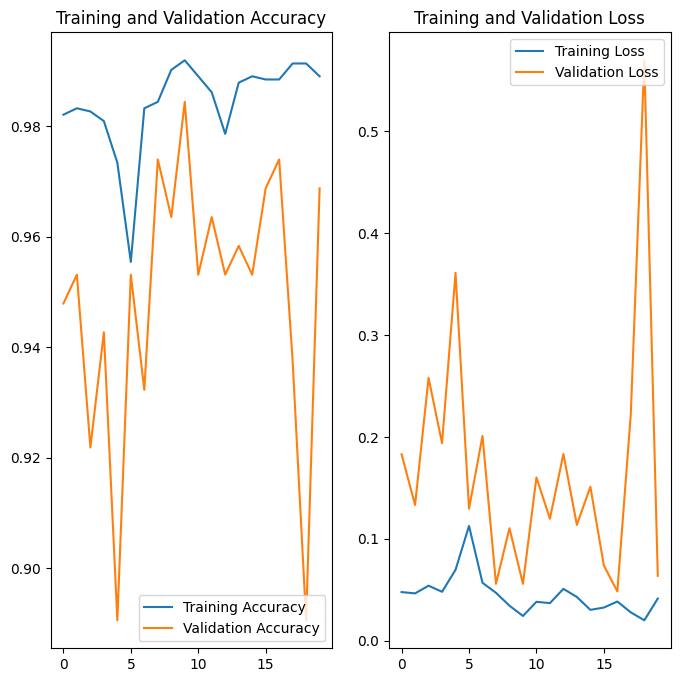

In [89]:
plt.figure(figsize=(8, 8))

# Plot for the Accuracy
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# Plot for the loss

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [76]:
# Now lets make some predictions to see what result we get by passing an image to the model
# lets take an image from the test data set and see what the model predicts. 
# we can compare what the actual image class says and what class model returns
# looking at the accuracy % of the model (in history) it should 90% be accurate


First Image To Predict
Actual Label of the image is:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Predicated Label of the image is:  Potato___Early_blight


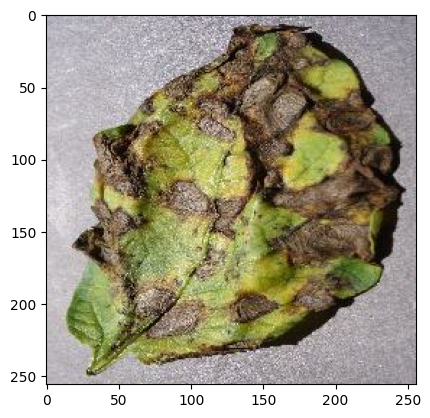

In [77]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    #print(images_batch[0]) # its tensor
    #print(images_batch[0].numpy())
    #print(images_batch[0].numpy().astype('uint8'))
    first_image = images_batch[0].numpy().astype('uint8') # at each run it will show different image as we shuffled them at the start in dataset
    first_label = labels_batch[0].numpy()

    print("First Image To Predict")
    plt.imshow(first_image)
    print("Actual Label of the image is: ", class_names[first_label])

    batch_predictions = model.predict(images_batch)
    #print(batch_predictions[0]) # it returns three dimenstions which is basically nothing than 3 neurons which we defined in model architecture as n_classes in the layer dense using softmax which is probabbility
    # and it returns three probabilities, and whatever is the highest priority is the class the image is. To find the max and the class:

    print("Predicated Label of the image is: ", class_names[np.argmax(batch_predictions[0])])
    

In [197]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


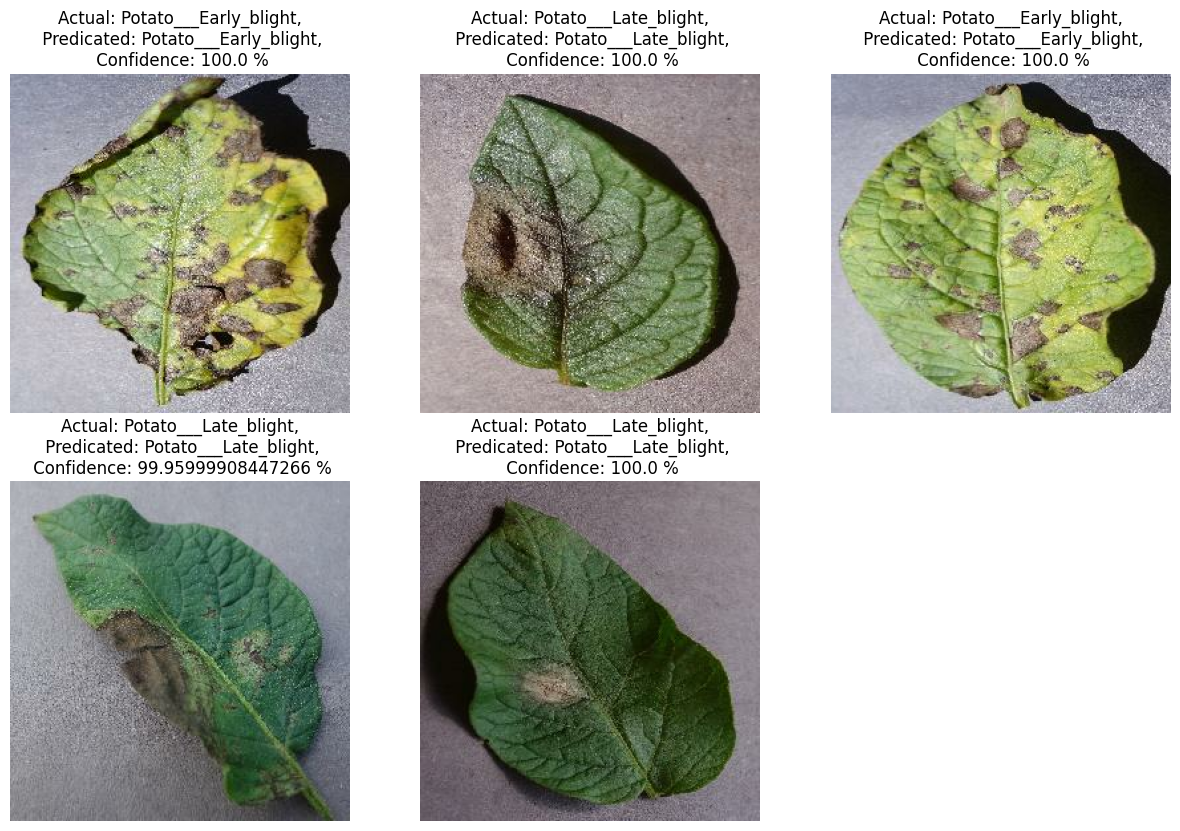

In [198]:
# now running the prediction on the entire batch and print those predictions
plt.figure(figsize=(15,15))
for images, lables in test_ds.take(1): # picked a batch
    for i in range(5):    # doing predictions on 5 images only - can do for all as well
        ax = plt.subplot(3, 3, i + 1)
        
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[lables[i]]
        plt.axis("off")
        plt.title(f"Actual: {actual_class},\n Predicated: {predicted_class},\n Confidence: {confidence} %")

In [199]:
# finally lets save the model on the disk which we can take anywhere
#import os
#for i in os.listdir("../models"):
#    print(int(i.split(".")[0]))

model_version = 1
model.save(f"../models/{model_version}.keras")